In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from myfunctions import *
import pandas_profiling as pp
%matplotlib inline
sns.set()
month_block = {0:'2013Jan', 1:'2013Feb', 2:'2013Mar', 3:'2013Apr', 4:'2013May', 5:'2013Jun',
              6:'2013Jul', 7:'2013Aug', 8:'2013Sep', 9:'2013Oct', 10:'2013Nov', 11:'2013Dec',
              12:'2014Jan', 13:'2014Feb', 14:'2014Mar', 15:'2014Apr', 16:'2014May', 17:'2014Jun',
              18:'2014Jul', 19:'2014Aug', 20:'2014Sep', 21:'2014Oct', 22:'2014Nov', 23:'2014Dec',
              24:'2015Jan', 25:'2015Feb', 26:'2015Mar', 27:'2015Apr', 28:'2015May', 29:'2015Jun',
              30:'2015Jul', 31:'2015Aug', 32:'2015Sep', 33:'2015Oct'}

In [2]:
df_item_categories = pd.read_csv("./Predicting_future_sales/data/item_categories.csv")
df_item_categories.head()

,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


In [3]:
# check if it contains any null values
df_item_categories.isnull().sum()

item_category_name    0
item_category_id      0
dtype: int64

In [4]:
df_item_categories.shape

(84, 2)

In [5]:
df_items = pd.read_csv("./Predicting_future_sales/data/items.csv")
df_items.head()

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


In [6]:
df_items.isnull().sum()

item_name           0
item_id             0
item_category_id    0
dtype: int64

In [7]:
df_items.shape

(22170, 3)

In [8]:
df_sales_train = pd.read_csv("./Predicting_future_sales/data/sales_train.csv")
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


In [9]:
df_sales_train.isnull().sum()

date              0
date_block_num    0
shop_id           0
item_id           0
item_price        0
item_cnt_day      0
dtype: int64

In [10]:
df_sales_train.shape

(2935849, 6)

In [11]:
# convert the date column to datetime
df_sales_train['date'] = pd.to_datetime(df_sales_train['date'], format='%d.%m.%Y', exact=True)
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,0,59,22154,999.00,1.0
1,2013-01-03,0,25,2552,899.00,1.0
2,2013-01-05,0,25,2552,899.00,-1.0
3,2013-01-06,0,25,2554,1709.05,1.0
4,2013-01-15,0,25,2555,1099.00,1.0


In [12]:
df_sales_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [13]:
# downcast the dataframe to save memory
df_sales_train = downcast(df_sales_train)
df_sales_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int32
shop_id           int32
item_id           int32
item_price        float32
item_cnt_day      float32
dtypes: datetime64[ns](1), float32(2), int32(3)
memory usage: 78.4 MB


In [14]:
# converting date_block_num into months
df_sales_train['month'] = df_sales_train['date_block_num'].map(month_block).fillna(df_sales_train['date_block_num'])
df_sales_train.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,month
0,2013-01-02,0,59,22154,999.000000,1.0,2013Jan
1,2013-01-03,0,25,2552,899.000000,1.0,2013Jan
2,2013-01-05,0,25,2552,899.000000,-1.0,2013Jan
3,2013-01-06,0,25,2554,1709.050049,1.0,2013Jan
4,2013-01-15,0,25,2555,1099.000000,1.0,2013Jan


In [15]:
# Reordering columns
df_sales_train = df_sales_train[['date', 'month', 'date_block_num', 'shop_id', 
                                 'item_id', 'item_price', 'item_cnt_day']]
df_sales_train.head()

,date,month,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,2013-01-02,2013Jan,0,59,22154,999.000000,1.0
1,2013-01-03,2013Jan,0,25,2552,899.000000,1.0
2,2013-01-05,2013Jan,0,25,2552,899.000000,-1.0
3,2013-01-06,2013Jan,0,25,2554,1709.050049,1.0
4,2013-01-15,2013Jan,0,25,2555,1099.000000,1.0


In [16]:
df_sample_submission = pd.read_csv("./Predicting_future_sales/data/sample_submission.csv")
df_sample_submission.head()

,ID,item_cnt_month
0,0,0.5
1,1,0.5
2,2,0.5
3,3,0.5
4,4,0.5


In [17]:
df_sample_submission.shape

(214200, 2)

In [18]:
df_shops = pd.read_csv("./Predicting_future_sales/data/shops.csv")
df_shops.head()

,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


In [19]:
df_shops.isnull().sum()

shop_name    0
shop_id      0
dtype: int64

In [20]:
df_shops.shape

(60, 2)

In [21]:
df_test = pd.read_csv("./Predicting_future_sales/data/test.csv")
df_test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [22]:
df_test.isnull().sum()

ID         0
shop_id    0
item_id    0
dtype: int64

### Let's merge the dataframes

In [23]:
train_items_merge = pd.merge(df_sales_train, df_items, on='item_id', how='outer')
train_items_merge.head()

,date,month,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,2013-01-02,2013Jan,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
1,2013-01-23,2013Jan,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
2,2013-01-20,2013Jan,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
3,2013-01-02,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37
4,2013-01-03,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37


In [24]:
train_items_categories_merge = pd.merge(train_items_merge, df_item_categories, on='item_category_id', how='outer' )
train_items_categories_merge.head()

,date,month,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name
0,2013-01-02,2013Jan,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
1,2013-01-23,2013Jan,0.0,24.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
2,2013-01-20,2013Jan,0.0,27.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
3,2013-01-02,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray
4,2013-01-03,2013Jan,0.0,25.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray


In [25]:
df = pd.merge(train_items_categories_merge, df_shops, on='shop_id', how='outer')
df.head()

,date,month,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-02,2013Jan,0.0,59.0,22154,999.0,1.0,ЯВЛЕНИЕ 2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
1,2013-04-26,2013Apr,3.0,59.0,944,150.0,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
2,2013-06-26,2013Jun,5.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
3,2013-07-20,2013Jul,6.0,59.0,944,199.5,1.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""
4,2013-09-14,2013Sep,8.0,59.0,944,299.0,2.0,2012 (BD),37,Кино - Blu-Ray,"Ярославль ТЦ ""Альтаир"""


In [26]:
df.dtypes # information about data types of columns

date                  datetime64[ns]
month                         object
date_block_num               float64
shop_id                      float64
item_id                        int64
item_price                   float32
item_cnt_day                 float32
item_name                     object
item_category_id               int64
item_category_name            object
shop_name                     object
dtype: object

In [27]:
df.shape

(2936212, 11)

In [28]:
df = df.dropna()
df.shape

(2935849, 11)

In [29]:
df_sales_train.shape

(2935849, 7)

In [30]:
df = df.sort_values(by='date')
df = df.reset_index(drop=True)
df.head()

,date,month,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-01,2013Jan,0.0,18.0,2589,279.0,1.0,DEPECHE MODE Exciter,55,Музыка - CD локального производства,"Красноярск ТЦ ""Июнь"""
1,2013-01-01,2013Jan,0.0,37.0,11391,899.0,1.0,"Дурная репутация 2 (Essentials) [PS3, русская ...",19,Игры - PS3,"Новосибирск ТЦ ""Мега"""
2,2013-01-01,2013Jan,0.0,14.0,1249,299.0,1.0,ADELE 21,55,Музыка - CD локального производства,"Казань ТЦ ""ПаркХаус"" II"
3,2013-01-01,2013Jan,0.0,19.0,2703,599.0,1.0,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",30,Игры PC - Стандартные издания,"Курск ТЦ ""Пушкинский"""
4,2013-01-01,2013Jan,0.0,27.0,3556,2199.0,1.0,Forza Motorsport 4 [Xbox 360],23,Игры - XBOX 360,"Москва ТЦ ""МЕГА Белая Дача II"""


In [31]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 11 columns):
date                  datetime64[ns]
month                 object
date_block_num        float64
shop_id               float64
item_id               int64
item_price            float32
item_cnt_day          float32
item_name             object
item_category_id      int64
item_category_name    object
shop_name             object
dtypes: datetime64[ns](1), float32(2), float64(2), int64(2), object(4)
memory usage: 1.4 GB


In [32]:
df['date_block_num'] = df['date_block_num'].astype(int)
df['shop_id'] = df['shop_id'].astype(int)
df.head()

,date,month,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_category_name,shop_name
0,2013-01-01,2013Jan,0,18,2589,279.0,1.0,DEPECHE MODE Exciter,55,Музыка - CD локального производства,"Красноярск ТЦ ""Июнь"""
1,2013-01-01,2013Jan,0,37,11391,899.0,1.0,"Дурная репутация 2 (Essentials) [PS3, русская ...",19,Игры - PS3,"Новосибирск ТЦ ""Мега"""
2,2013-01-01,2013Jan,0,14,1249,299.0,1.0,ADELE 21,55,Музыка - CD локального производства,"Казань ТЦ ""ПаркХаус"" II"
3,2013-01-01,2013Jan,0,19,2703,599.0,1.0,"Dark Souls: Prepare to Die Edition [PC, Jewel,...",30,Игры PC - Стандартные издания,"Курск ТЦ ""Пушкинский"""
4,2013-01-01,2013Jan,0,27,3556,2199.0,1.0,Forza Motorsport 4 [Xbox 360],23,Игры - XBOX 360,"Москва ТЦ ""МЕГА Белая Дача II"""


In [33]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 11 columns):
date                  datetime64[ns]
month                 object
date_block_num        int32
shop_id               int32
item_id               int64
item_price            float32
item_cnt_day          float32
item_name             object
item_category_id      int64
item_category_name    object
shop_name             object
dtypes: datetime64[ns](1), float32(2), int32(2), int64(2), object(4)
memory usage: 1.4 GB


In [34]:
df.shape

(2935849, 11)

In [35]:
df_date = pd.DataFrame([{'date': k,
                        'item_cnt_day': v.item_cnt_day.sum()}
                       for k, v in df.groupby(['date'])],
                      columns=['date', 'item_cnt_day'])

df_date.head()

,date,item_cnt_day
0,2013-01-01,1951.0
1,2013-01-02,8198.0
2,2013-01-03,7422.0
3,2013-01-04,6617.0
4,2013-01-05,6346.0


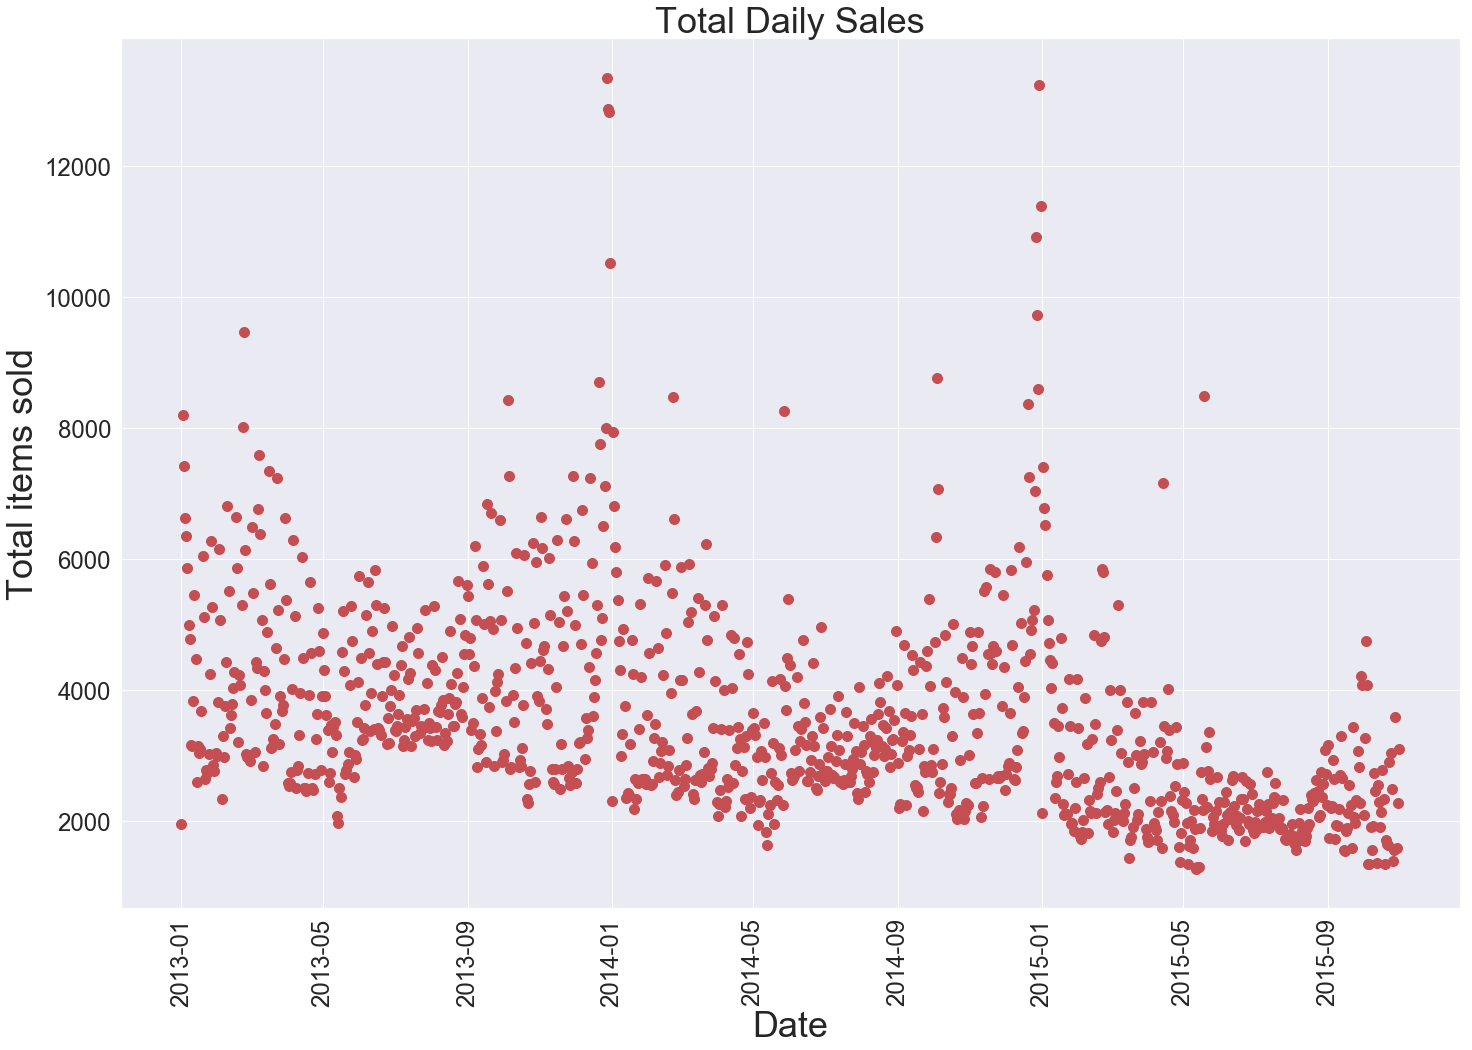

In [36]:
x = df_date['date']
y = df_date['item_cnt_day']
plt.subplots(figsize=(24,16))
_ = plt.plot(x, y, marker='.', markersize=20, linestyle='none', color='r')
_ = plt.xlabel('Date', fontsize=36)
_ = plt.ylabel('Total items sold', fontsize=36)
_ = plt.xticks(rotation=90, fontsize=24)
#plt.xticks(np.arange(1, 1034, 20))
_ = plt.yticks(fontsize=24)
_ = plt.title('Total Daily Sales', fontsize=36)
plt.show()